In [1]:
from os.path import join
from itertools import compress
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from tqdm import tqdm
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix as cm
from sklearn.decomposition import PCA

# helper functions
from importlib import reload
import model_utils
reload(model_utils)
import data_utils
import viz_utils

plt.rcParams["font.family"] = "Times New Roman"

wd = join("..", "data")
imdir = join(wd, 'images')

In [2]:
gdf = gpd.read_file(join(wd, 'results', 'unseen test set', 'unseen_results.gpkg'))
gdf = gdf[gdf['dist_pw'] > 0]

TP = gdf[gdf['error_type'] == 'TP']
TN = gdf[gdf['error_type'] == 'TN']
FP = gdf[gdf['error_type'] == 'FP']
FN = gdf[gdf['error_type'] == 'FN']

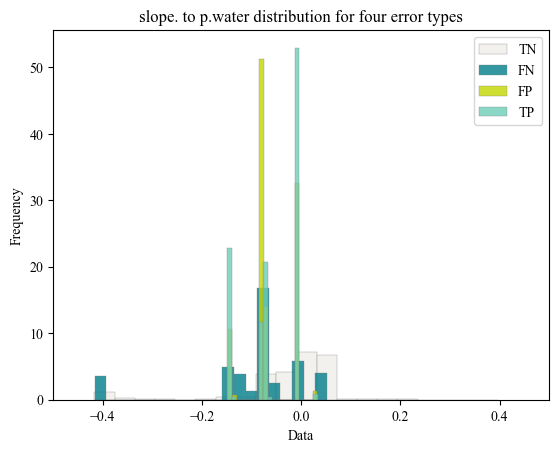

In [132]:
from viz_utils import soge_colours

# def binfunc(data, binwidth):
# """
# >>>bins=binfunc(TN[feature], binwidth)
# """
#     bins = np.arange(min(data), max(data) + binwidth, binwidth)
#     return bins

# binwidth = 0.15


feature = 'slope_pw'
hist_kwargs = {'alpha': 0.8, 'density': True, 'bins':20, 'linewidth': 0.3, 'edgecolor': 'grey'}


fig, ax = plt.subplots()
ax.hist(TN[feature], color=soge_colours['beige'], label='TN', **hist_kwargs)
ax.hist(FN[feature], color=soge_colours['medium turquoise'], label='FN', **hist_kwargs)
ax.hist(FP[feature], color=soge_colours['yellowish green'], label='FP', **hist_kwargs)
ax.hist(TP[feature], color=soge_colours['light turquoise'], label='TP', **hist_kwargs)
ax.legend()

ax.set_title(f"{viz_utils.labels[feature]} distribution for four error types")
ax.set_xlabel('Data')
ax.set_ylabel('Frequency')
ax.set_xlim([-.5, .5])

plt.show()

fig.savefig(join(wd, 'results', 'unseen test set', f'distribution_{feature}.png'), dpi=400, bbox_inches='tight')

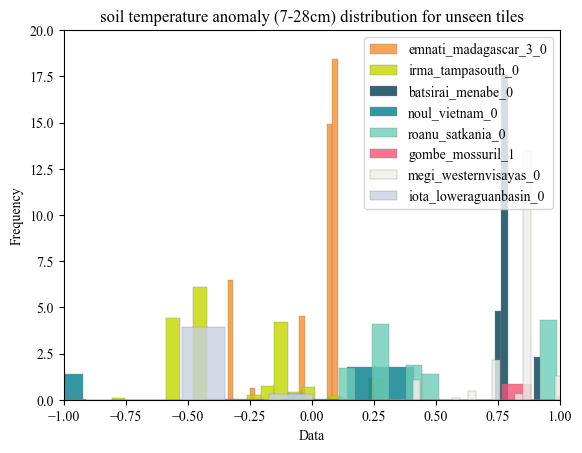

In [128]:
feature = 'soiltemp2_anom'
hist_kwargs = {'alpha': 0.8, 'density': True, 'bins': 20, 'linewidth': 0.3, 'edgecolor': 'grey'} # 'orientation': 'horizontal'}
               

cols = [*viz_utils.soge_colours.values()]
cols.remove('#002147')

fig, ax = plt.subplots()
for event, colour in zip(gdf['event'].unique(), cols):
    gdf_event = gdf[gdf['event'] == event]
    ax.hist(gdf_event[feature], color=colour, label=event, **hist_kwargs)
    ax.legend(loc='upper right')
    
ax.set_title(f"{viz_utils.labels[feature]} distribution for unseen tiles")
ax.set_xlabel('Data')
ax.set_ylabel('Frequency')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 20])

plt.show()

fig.savefig(join(wd, 'results', 'unseen test set', f'eventdists_{feature}.png'), dpi=400, bbox_inches='tight')